In [20]:
import cv2 

img = cv2.imread('/Users/tony/Desktop/test.jpg')
print(img.shape)

# 缩放成200x200的方形图像
img_200x200 = cv2.resize(img, (200, 200))

# 不直接指定缩放后大小，通过fx和fy指定缩放比例，0.5则长宽都为原来一半
# 等效于img_200x300 = cv2.resize(img, (300, 200))，注意指定大小的格式是(宽度,高度)
# 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
img_200x300 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, 
                              interpolation=cv2.INTER_NEAREST)

# 在上张图片的基础上，上下各贴50像素的黑边，生成300x300的图像
img_300x300 = cv2.copyMakeBorder(img, 50, 50, 0, 0, 
                                       cv2.BORDER_CONSTANT, 
                                       value=(0, 0, 0))

# 对照片中树的部分进行剪裁
patch_tree = img[20:150, -180:-50]

cv2.imwrite('cropped_tree.jpg', patch_tree)
cv2.imwrite('resized_200x200.jpg', img_200x200)
cv2.imwrite('resized_200x300.jpg', img_200x300)
cv2.imwrite('bordered_300x300.jpg', img_300x300)




(515, 722, 3)


True

In [24]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# RBG to HSV

# 2green H
turn_green_hsv = img_hsv.copy()
turn_green_hsv[:,:,0] = (turn_green_hsv[:,:,0]+15)%180
turn_green_img = cv2.cvtColor(turn_green_hsv,cv2.COLOR_HSV2BGR)
cv2.imwrite('turn_green.jpg',img)

# reduce  S
colorless_hsv = img_hsv.copy()
colorless_hsv[:,:,1] = 0.5*colorless_hsv[:,:,1]
colorless_img = cv2.cvtColor(colorless_hsv,cv2.COLOR_HSV2BGR)
cv2.imwrite('colorless.jpg',colorless_img)

# reduce V
darker = img_hsv.copy()
darker[:,:,2] = 0.5*darker[:,:,2]
darker = cv2.cvtColor(darker,cv2.COLOR_HSV2BGR)
cv2.imwrite('darker.jpg',darker)

True

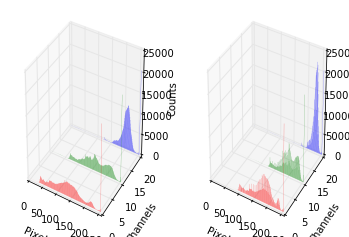

In [30]:
import numpy as np

# 分通道计算每个通道的直方图
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])
# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)

# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升
img_corrected = gamma_trans(img, 0.5)
cv2.imwrite('gamma_corrected.jpg', img_corrected)

# 分通道计算Gamma矫正后的直方图
hist_b_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])
hist_g_corrected = cv2.calcHist([img_corrected], [1], None, [256], [0, 256])
hist_r_corrected = cv2.calcHist([img_corrected], [2], None, [256], [0, 256])

# 将直方图进行可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

pix_hists = [
    [hist_b, hist_g, hist_r],
    [hist_b_corrected, hist_g_corrected, hist_r_corrected]
]

pix_vals = range(256)
for sub_plt, pix_hist in zip([121, 122], pix_hists):
    ax = fig.add_subplot(sub_plt, projection='3d')
    for c, z, channel_hist in zip(['b', 'g', 'r'], [20, 10, 0], pix_hist):
        cs = [c] * 256
        ax.bar(pix_vals, channel_hist, zs=z, zdir='y', color=cs, alpha=0.618, edgecolor='none', lw=0)

    ax.set_xlabel('Pixel Values')
    ax.set_xlim([0, 256])
    ax.set_ylabel('Channels')
    ax.set_zlabel('Counts')

plt.show()

In [33]:
import cv2
import numpy as np

# 读取一张斯里兰卡拍摄的大象照片
img = cv2.imread('../Desktop/test.jpg')
cv2.resize(img,(400,600))
# 沿着横纵轴放大1.6倍，然后平移(-150,-240)，最后沿原图大小截取，等效于裁剪并放大
M_crop_elephant = np.array([
    [1.6, 0, -150],
    [0, 1.6, -240]
], dtype=np.float32)

img_elephant = cv2.warpAffine(img, M_crop_elephant, (400, 600))
cv2.imwrite('lanka_elephant.jpg', img_elephant)

# x轴的剪切变换，角度15°
theta = 15 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)

img_sheared = cv2.warpAffine(img, M_shear, (400, 600))
cv2.imwrite('lanka_safari_sheared.jpg', img_sheared)

# 顺时针旋转，角度15°
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

img_rotated = cv2.warpAffine(img, M_rotate, (400, 600))
cv2.imwrite('lanka_safari_rotated.jpg', img_rotated)

# 某种变换，具体旋转+缩放+旋转组合可以通过SVD分解理解
M = np.array([
    [1, 1.5, -400],
    [0.5, 2, -100]
], dtype=np.float32)

img_transformed = cv2.warpAffine(img, M, (400, 600))
cv2.imwrite('lanka_safari_transformed.jpg', img_transformed)


True